        Retailer ID                   Invoice Date  Price per Unit  \
count  9.648000e+03                           9648     9648.000000   
mean   1.173850e+06  2021-05-10 15:20:44.776119296       45.216625   
min    1.128299e+06            2020-01-01 00:00:00        7.000000   
25%    1.185732e+06            2021-02-17 00:00:00       35.000000   
50%    1.185732e+06            2021-06-04 00:00:00       45.000000   
75%    1.185732e+06            2021-09-16 00:00:00       55.000000   
max    1.197831e+06            2021-12-31 00:00:00      110.000000   
std    2.636038e+04                            NaN       14.705397   

        Units Sold    Total Sales  Operating Profit  Operating Margin  
count  9648.000000    9648.000000       9648.000000       9648.000000  
mean    256.930037   93273.437500      34425.244761          0.422991  
min       0.000000       0.000000          0.000000          0.100000  
25%     106.000000    4254.500000       1921.752500          0.350000  
50%     1

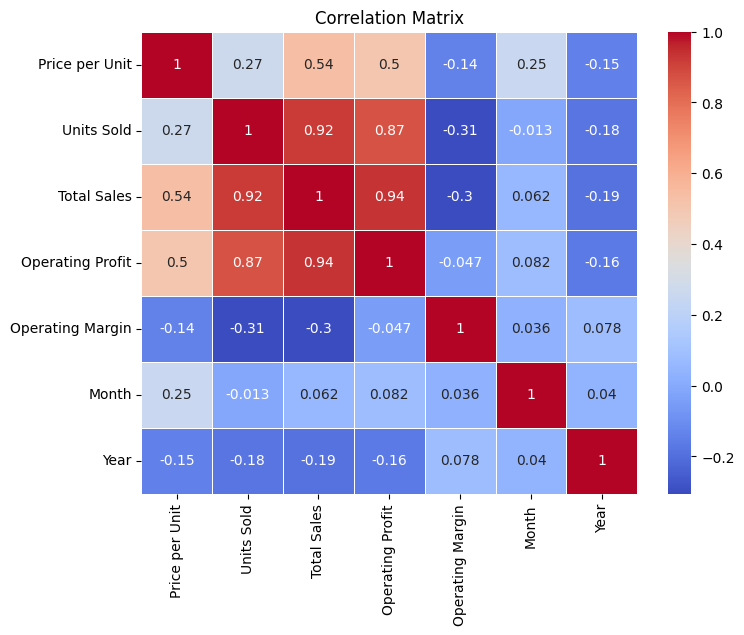

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import folium

df = pd.read_excel(r'C:\Users\M TEGAR RADIANSYAH\OneDrive\Desktop\TUGAS AKHIR\Adidas United States Sales Datasets.xlsx')

# Memeriksa deskripsi statistik dasar
print(df.describe())

df['Calculated Total Sales'] = df['Price per Unit'] * df['Units Sold']
df['Calculated Operating Profit'] = df['Calculated Total Sales'] * df['Operating Margin']

incorrect_total_sales = (~df['Calculated Total Sales'].eq(df['Total Sales'])).sum()
incorrect_operating_profit = (~df['Calculated Operating Profit'].eq(df['Operating Profit'])).sum()

incorrect_total_sales, incorrect_operating_profit

df['Total Sales'] = df['Calculated Total Sales']
df['Operating Profit'] = df['Calculated Operating Profit']

df = df.drop(columns=['Calculated Total Sales', 'Calculated Operating Profit'])

df['Week day'] = df['Invoice Date'].dt.day_name()
df['Month'] = df['Invoice Date'].dt.month
df['Year'] = df['Invoice Date'].dt.year
df['Season'] = df['Month'].apply(lambda x: 'Winter' if (x  in [1, 2, 12]) else 
                                            'Spring' if (x in [3, 4, 5]) else 
                                            'Summer' if (x in [6, 7, 8]) else 
                                            'Autumn')
df['Month Year'] = df['Invoice Date'].dt.to_period('M').astype('datetime64[ns]')

df[['Type', 'Group']] = df['Product'].str.extract(r"(Men's|Women's)\s(.*)")

df.drop('Retailer ID',inplace=True, axis=1)

# Mengubah tipe data kolom Invoice Date menjadi datetime64[ns]
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], dayfirst=True)

# Pilih hanya kolom numerik
numeric_df = df.select_dtypes(include=['number'])

# Hitung matriks korelasi
correlation_matrix = numeric_df.corr()

# Visualisasikan matriks korelasi menggunakan heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
